In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [134]:
import bone
reload(bone)
def getHighJava(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    ofh = open(".arrorder", "w")
    for i in order:
        ofh.write(ana.headers[i] + "\n")
    ofh.close()
    from subprocess import check_output
    cmd = ['java', '-cp', '/booleanfs2/sahoo/Hegemon',
           'tools.Hegemon', 'high', ana.h.getPre(),
           '.arrorder', str(thr), str(nthr)]
    result = check_output(cmd, input='')
    l1 = result.decode('utf-8').split('\n')
    res = [k.split('\t') for k in l1 if k != '']
    res = [[k[0], ana.h.getSimpleName(k[0]), k[1]] for k in res]
    return res
def getRelStatsJava(ana, id1, order, sthr=3.0, pthr=0.1):
    ofh = open(".arrorder", "w")
    for i in order:
        ofh.write(ana.headers[i] + "\n")
    ofh.close()
    from subprocess import check_output
    cmd = ['java', '-cp', '/booleanfs2/sahoo/Hegemon',
           'tools.Hegemon', 'Bool', ana.h.getPre(),
           id1, '.arrorder']
    result = check_output(cmd, input='')
    l1 = result.decode('utf-8').split('\n')
    res = {}
    for line in l1:
        if line == '':
            continue
        k = line.split('\t')
        bs = bone.np.array([k[2:6], k[2:6], k[6:10], k[10:]]).astype(bone.np.float)
        rel = bone.hu.getBooleanRelationType(bs, sthr, pthr)
        if rel[0] not in res:
            res[rel[0]] = {}
        res[rel[0]][k[1]] = rel[1]
    return res

def getGlobal(self, tn=1):
    self.prepareData("GL1")
    df = bone.pd.read_csv("rxcovea/annotation.csv", index_col=0)
    atype = ["", ""] + [str(df['tissue_state'][k]) if k in df['tissue_state']
                        else "nan" for k in ana.h.headers[2:]]
    atypes = ["nan", 'solid', 'mix', 'liquid', 'cellline', 'unknown', 'lymphoma',
       'lymph', 'cellline_p3', 'bonemarrow', 'saliva']
    ahash = {}
    if tn == 2:
        atypes = ['solid', 'liquid', 'cellline']
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getGlobal = getGlobal
def getGlobalNeu(self, tn=1):
    self.prepareData("GL1")
    cfile = "/booleanfs2/sahoo/Data/BooleanLab/RxCovea/human-gpl570-tissue.txt"
    df = bone.pd.read_csv(cfile, sep="\t", index_col=0)
    atype = ["", ""] + [str(df['c Tissue'][k]) if k in df['c Tissue']
                        else "" for k in ana.h.headers[2:]]
    atypes = ["Other", 'Neu']
    ahash = {}
    for title in atype[2:]:
        if "neutrophil" in title.lower():
            ahash[title] = 1
        else:
            ahash[title] = 0
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getGlobalNeu = getGlobalNeu
def getNorvershtern2011(self, tn=1):
    self.prepareData("G19")
    atype = self.h.getSurvName('c cell type')
    atypes = ['Other', 'Neu', 'NeuM', 'Eos', 'Bas', 'NK']
    ahash = {'Granulocyte (Neutrophil)':1,
             'Granulocyte (Neutrophilic Metamyelocyte)':2,
             'Eosinophill':3, 'Basophils':4,
            'Mature NK cell_CD56+ CD16+ CD3-':5}
    for title in atype[2:]:
        if title not in ahash:
            ahash[title] = 0
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getNorvershtern2011 = getNorvershtern2011
def getJeffrey2006(self, tn=1):
    self.prepareData("MACV52")
    atype = self.h.getSurvName("c Title")
    atype = [bone.re.sub("_.*", "", str(k)) for k in atype]
    atypes = ['Other', 'Neu', 'Mac', 'Eos', 'Bas', 'NK']
    ahash = {'Neutrophils':1, 'Cord blood-derived mast cells':0,
             'Th2 cells':0, 'Th1 cells':0, 'Dendritic cells':0,
             'Immature dendritic cells':0, 'B cells':0, 'NK cells':5,
             'Macrophages':2, 'Central memory T cells':0, 'Basophils':4,
             'Eosinophils':3, 'Effector memory T cells':0}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getJeffrey2006 = getJeffrey2006

def getAllantaz2011(self, tn=1):
    self.prepareData("NEU6", cfile = "/Users/rohan/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName("c cell type (ch1)")
    atypes = ['B', 'T', 'Neu', "Mo", 'Eos', 'NK']
    ahash = {'CD19+ B cells':0, 'CD14+ monocytes':3, 'CD4+ T cells':1,
             'CD8+ T cells':1, 'Eosinophils':4, 'NK cells':5, 'Neutrophils':2}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getAllantaz2011 = getAllantaz2011

def getMonaco2017(self, tn=1):
    self.prepareData("NEU12", cfile = "/Users/rohan/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName("c cell type (ch1)")
    atypes = ['Other', 'Neu', 'Mo', 'Bas', 'NK']
    ahash = {'Classical monocytes':2, 'Intermediate monocytes':2,
             'Non classical monocytes':2, 'Natural killer cells':4,
             'Low-density neutrophils':1, 'Low-density basophils':3}
    for title in atype[2:]:
        if title not in ahash:
            ahash[title] = 0
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getMonaco2017 = getMonaco2017

def getTharp2023(self, tn=1):
    self.prepareData("MACV325")
    atype = self.h.getSurvName("c cell type")
    atypes = ['WL', 'Neu', 'Mac']
    ahash = {'Whole lung':0, 'Interstitial Macrophage':2,
             'Neutrophil':1, 'Alveolar Macrophage':2}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getTharp2023 = getTharp2023
def getBacac2023(self, tn=1):
    self.prepareData("MACV330")
    atype = self.h.getSurvName("c timepoint")
    atypes = ['4h', '20h']
    ahash = {}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getBacac2023 = getBacac2023


Novershtern 2011 Human Hematopoiesis (n = 211)
GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19
211 [187, 4, 4, 5, 6, 5] GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19 G19
Other vs Neu -0.546, 0.623
Other vs NeuM -0.924, 0.42
Other vs Eos -1.73, 0.137
Other vs Bas -4.12, 0.000756
Other vs NK 1.39, 0.225
Neu vs NeuM 0.123, 0.908
Neu vs Eos 0.206, 0.849
Neu vs Bas 0.0519, 0.962
Neu vs NK 0.913, 0.421
NeuM vs Eos 0.157, 0.883
NeuM vs Bas -0.183, 0.866
NeuM vs NK 1.57, 0.176
Eos vs Bas -0.786, 0.462
Eos vs NK 2.25, 0.0595
Bas vs NK 3.1, 0.0279


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


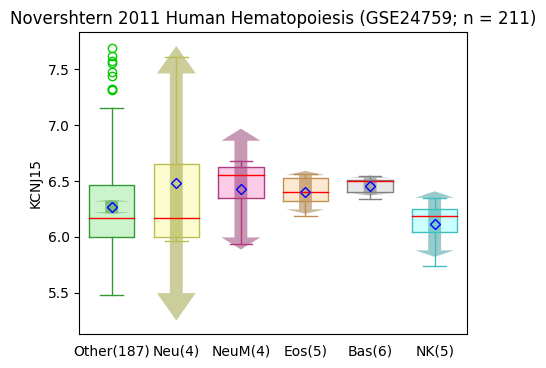

In [203]:
ana = bone.IBDAnalysis()
#ana.getGlobal()
ana.getNorvershtern2011()
#ana.getJeffrey2006()
#ana.getAllantaz2011()
#ana.getMonaco2017()
#ana.getTharp2023()
#ana.getGlobalNeu()
#ana.getBacac2023()
ax,bp = ana.printGene("KCNJ15", None, {'w':5, 'h':4, 'vert':1})

In [270]:
whole_dataset = [
    ["MAC118", "c wbc_cells_per_ul"],
    ["COV192", "c nasal.wbc.percentage"],
    ["COV192.2", "c blood.wbc.count"],
    ["COV247", "c pwbc"], ["COV257", "c pwbc"],
    ["COV314", "c wbc"], ["COV410", "c wbc"],
    ["LK6", "c Baseline WBC"], 
    ["LK3", 'n  PBWBC@presentation '],
    ["LK19", 'c WBC, 1000/microliter '], 
    ["LK29", 'c WBC'],
    ["LK30", 'c WBC'], 
    ["LK31", 'c WBC'],
    ["LK34", 'c WBC at Diagnosis'],
    ["MACV296", 'c total white blood count (x 10^3 cels/ul)'],
    ["MACV296", 'c sputum white blood cells %'],
    ["MACV298", 'c wbc'], 
    ["MACV305", "c wbc"], 
    ["MACV306", "c wbc.count"],
    ["MACV307", "c wbc"], 
    ["MACV308", "c wbc (10e9/l)"],
    ["MACV309", 'c wbc'], 
    ["MACV310", "c white cells count"],
    ['COV429', 'c Leuko']
]

whole_blood= [
    ["COV192.2", "c blood.wbc.count"],
    ["MAC118", "c wbc_cells_per_ul"],
    ["COV247", "c pwbc"],
    ["LK6", "c Baseline WBC"],
    ["MACV307", "c wbc"],
    ["MACV309", 'c wbc'],
    ["MACV310", "c white cells count"],
    ["COV257", "c pwbc"]
]

none_blood=[
    ["COV192", "c nasal.wbc.percentage"], #nasal
    ["LK3", 'n  PBWBC@presentation '], #bone marrow
    ["LK19", 'c WBC, 1000/microliter '], #bone marrow
    ["MACV296", 'c sputum white blood cells %'],#sputum airway cells
    ["MACV296", 'c total white blood count (x 10^3 cels/ul)'],#sputum airway cells
    ["MACV298", 'c wbc'], #bone marrow 
    ["MACV305", "c wbc"], #bronchoalveolar lavage
    ["LK30", 'c WBC'], #bone marrow
    ["LK31", 'c WBC'], #bone marrow
    ["LK34", 'c WBC at Diagnosis'], #bone marrow
    ["LK29", 'c WBC'],#bone marrow
]

PBMC_GD=[
    ["COV314", "c wbc"], 
    ["COV410", "c wbc"],
    ["MACV306", "c wbc.count"],
]

special=[
    ["MACV308", "c wbc (10e9/l)"]
]

In [277]:
whole_dataset = [
    ["COV192", "c nasal.neutrophil.percentage"],
    ["COV192.2", "c blood.neutrophil.differential"],
    ["COV247", "c anc"], ["COV257", "c anc"],
    ["COV314", "c per neutrophils"],
    ["COV314", "c abs neutrophils"],
    ["MACV296", 'c blood neutrophil count (cells/ul)'],
    ["MACV296", 'c sputum differential neutrophil count %'],
    ["MACV305", 'c neutrophl_pct'], 
    ["MACV306", 'c neutrophils_count'],
    ["MACV307", 'c neutrophil_count'],
    ["MACV307", 'c neutrophil_percent'],
    ["MACV308", 'c neu (10e9/l)'],
    ["MACV309", 'c neutrophil'],
    ["MACV309", 'c neutrophils'],
    ["MACV310", 'c neutrophil count'],
    ['COV429', 'c Neutrophil'],
    ['MACV331', 'c diff cell count neutrophils (%)'],
    ['MACV332', 'c neutrophils']
]

19
Krebs 2020 bd (n = 480)
GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332
0 [0, 0] GSE124326 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV332 MACV332
[5]


(0.5072657988930593, 0.5514795204357891)

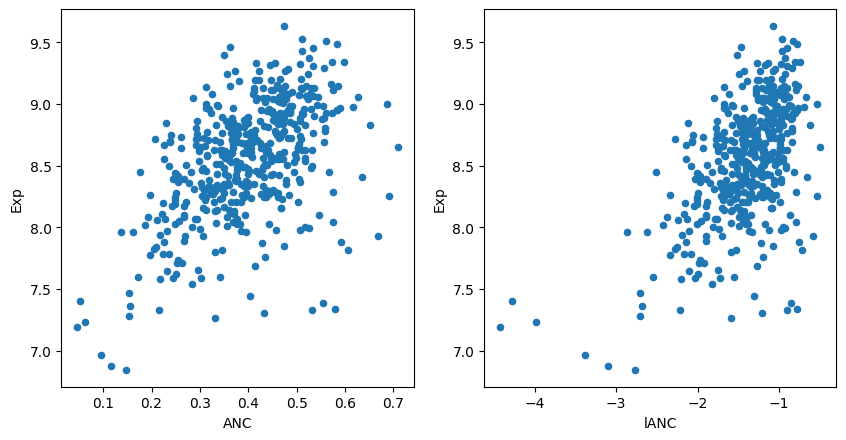

In [320]:
pd = bone.pd
np = bone.np
sns = bone.sns
import numpy.ma as ma
list1 = whole_dataset
dataset = list1[-1]
print(len(list1))
ana = bone.IBDAnalysis()
ana.getSurvival(dataset[0])
wbc = ana.h.getSurvName(dataset[1])
expr = ana.h.getExprData("CHST15")
wt1, l1 = [1], [['KCNJ15', 'NAMPT', 'DYSF', 'BASP1', 'TNFRSF1A']]
ana.order = ana.h.aRange()
ana.orderData(l1, wt1)
#expr = ["", ""] + list(ana.f_ranks)
df = pd.DataFrame()
ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
         'unknown':1, 'Missing Data':1}
df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
df['lANC'] = np.log(df['ANC'])/np.log(2)
df['Exp'] = pd.to_numeric(expr[2:])
#atype = ana.h.getSurvName('c cell type')
#df['Type'] = atype[2:]
#df = df[df['Type'] == 'whole blood']
fig,axlist = bone.plt.subplots(ncols=2, nrows=1, figsize=(10,5), dpi=100)
df.plot.scatter('ANC', 'Exp', ax=axlist[0])
df.plot.scatter('lANC', 'Exp', ax=axlist[1])
#sns.scatterplot(data=df, x='ANC', y='Exp', hue='Type', ax=axlist[0])
#sns.scatterplot(data=df, x='lANC', y='Exp', hue='Type', ax=axlist[1])
#df.corr('pearson')['ANC']['Exp']
corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
corr2 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['lANC']))[0][1]
(corr1, corr2)

Altman 2019 asthma Nasal (n = 523)
GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192
0 [0, 0] GSE115770 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192 COV192
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Wright 2018 kd 2 (n = 692)
GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247
0 [0, 0] GSE73464 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV247 COV247
Burns 2020 kd tpm (n = 121)
Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257
0 [0, 0] Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257 COV257
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314
0 [0, 0] GSE84152 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV314 COV314
Gideon 2016 tb (n = 470)
GSE84152 http://hegemon.ucsd.ed

[(0.6916245634578301, 0.6579287560394226),
 (0.7446410552383456, 0.7379630555174727),
 (0.25798246099846756, 0.2833231873109675),
 (0.37880309145932384, 0.41747826098817825),
 (-0.050285753675089084, -0.016382911951957208),
 (-0.07017636081847876, -0.05239027839514068),
 (0.08413684230533755, 0.022034421014870485),
 (0.3913934504240888, 0.2838586082446819),
 (-0.004554153742233225, -0.003058998226983956),
 (-0.1555004238130602, -0.08526533406415042),
 (0.16744169719695237, 0.15455359091563936),
 (0.15492673138709112, 0.1503240784985538),
 (-0.051582182372779097, -0.0034330414497460338),
 (0.7636644195733763, 0.7931496539018209),
 (0.5887960926789768, 0.7179400702536971),
 (0.3818500843437568, 0.33406706745927),
 (0.5835292307175731, 0.5588562958400509),
 (0.9282770237538307, 0.8688603817884296),
 (0.6286092378589381, 0.66817768407823)]

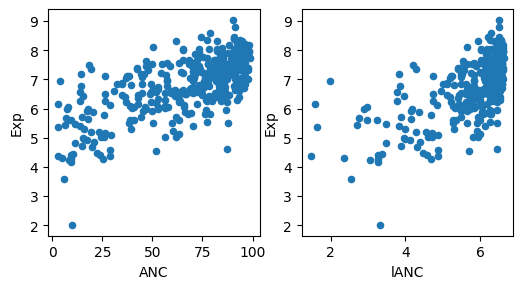

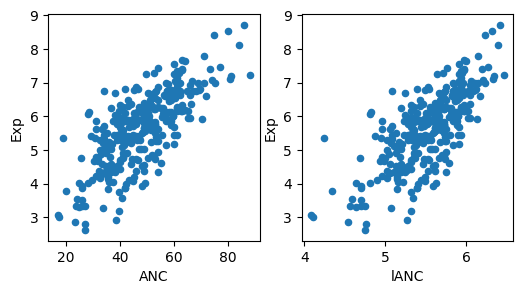

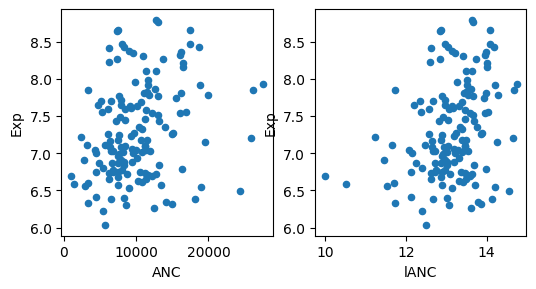

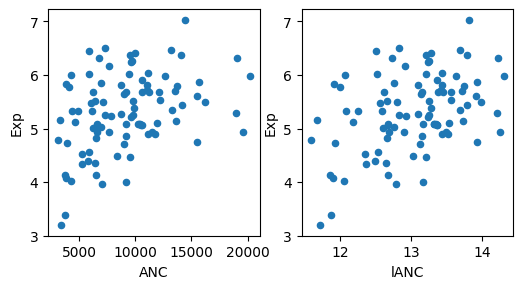

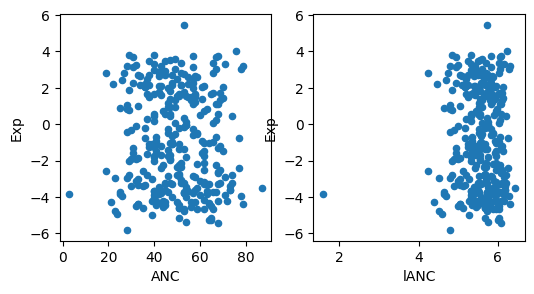

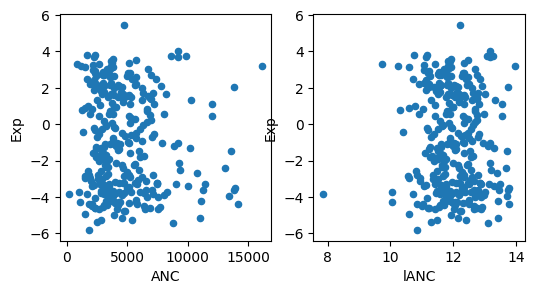

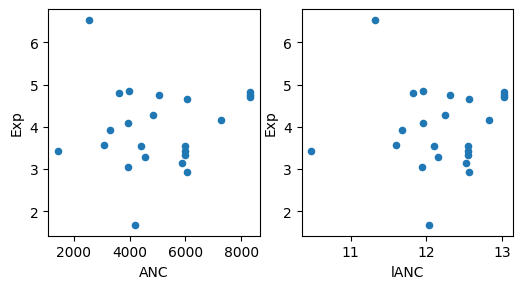

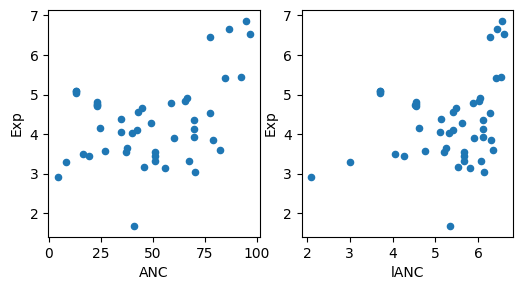

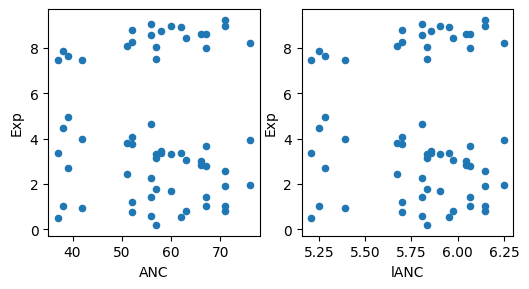

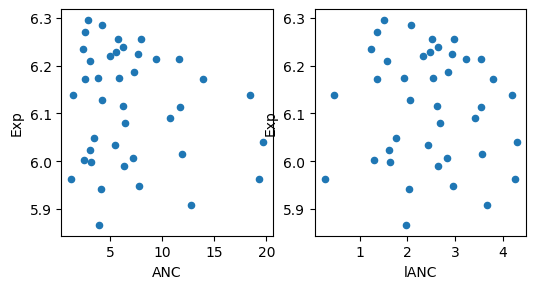

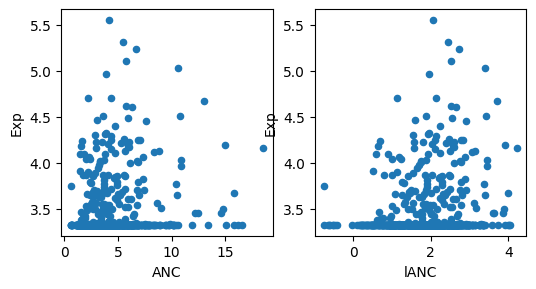

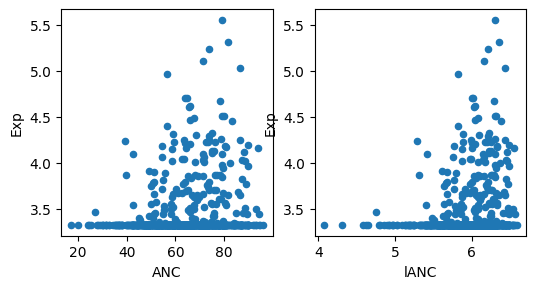

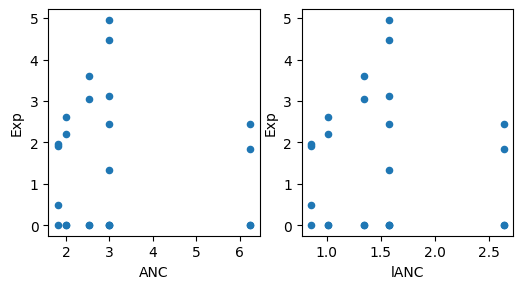

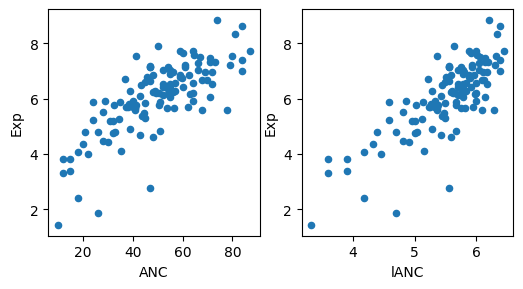

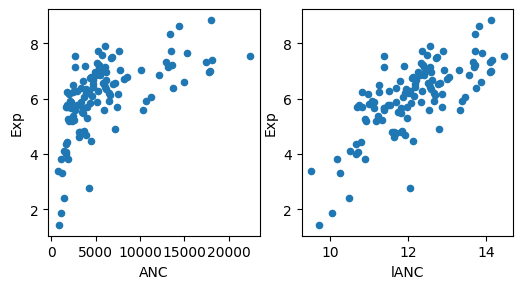

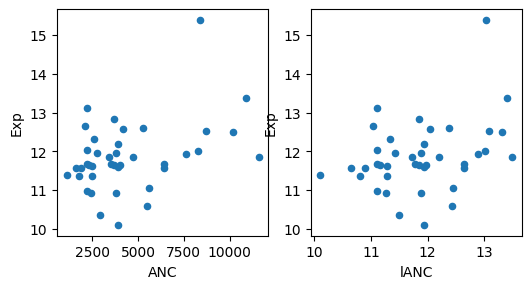

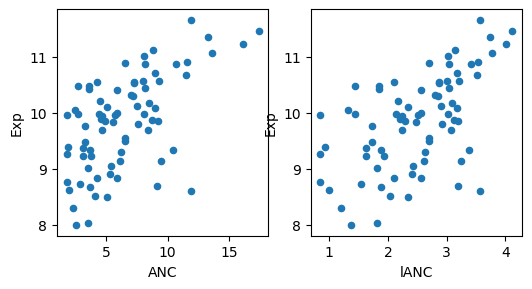

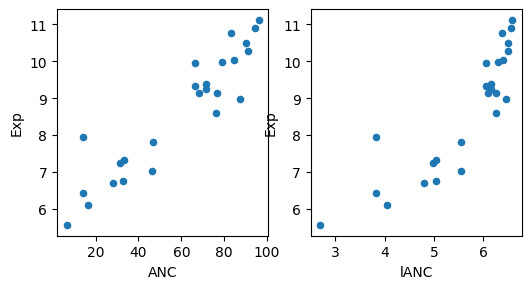

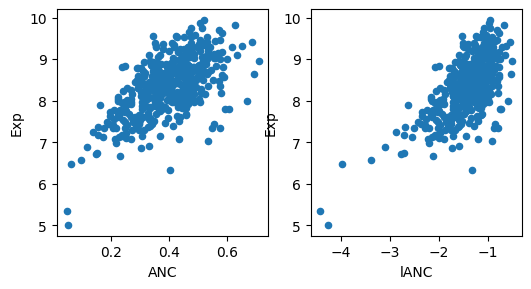

In [283]:
res = []
for id1 in list1:
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    expr = ana.h.getExprData("KCNJ15")
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['lANC'] = np.log(df['ANC'])/np.log(2)
    df['Exp'] = pd.to_numeric(expr[2:])
    fig,axlist = bone.plt.subplots(ncols=2, nrows=1, figsize=(6,3), dpi=100)
    df.plot.scatter('ANC', 'Exp', ax=axlist[0])
    df.plot.scatter('lANC', 'Exp', ax=axlist[1])
    #corr = df.corr('pearson')['WBC']['Exp']
    corr1 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['ANC']))[0][1]
    corr2 = ma.corrcoef(ma.masked_invalid(df['Exp']), ma.masked_invalid(df['lANC']))[0][1]
    res += [(corr1, corr2)]
res

Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV192.2
Altman 2019 asthma Blood (n = 511)
GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2
0 [0, 0] GSE115823 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV192.2 COV1

[(0.7446410552383456, 0.7379630555174727, 'KCNJ15'),
 (0.6040515352150865, 0.5792745049543165, 'TLR4'),
 (0.5432798981413257, 0.5408932661732258, 'FCGR3A'),
 (0.5725766196507295, 0.5859838497370476, 'PAK1'),
 (0.6491965376817933, 0.6224737657552499, 'WDFY3'),
 (0.5669941285079185, 0.5455557662163389, 'UBE2D1'),
 (0.6768674815266839, 0.6681459198917123, 'CLEC4E'),
 (0.5362954384957814, 0.5401232175577325, 'DOCK5'),
 (0.5916257470312888, 0.5749844304070076, 'MEGF9'),
 (0.6040423124980272, 0.6050092493367972, 'ABHD5'),
 (0.7007063172660057, 0.6779965221736178, 'LIMK2'),
 (0.703606220258368, 0.6834572488640519, 'BCL6'),
 (0.6569467707260888, 0.6367138605388042, 'IL13RA1'),
 (0.4107653739765665, 0.44040709573664927, 'LST1'),
 (0.7182561343997607, 0.7064945903434955, 'NAMPT'),
 (0.6839067040986693, 0.6779122228250414, 'MBOAT7'),
 (0.7664306447175695, 0.7461208133105325, 'DYSF'),
 (0.36837243368739747, 0.38753044048166235, 'OGFRL1'),
 (0.6790994702275923, 0.6521775240311429, 'ARHGAP26'),
 (0.

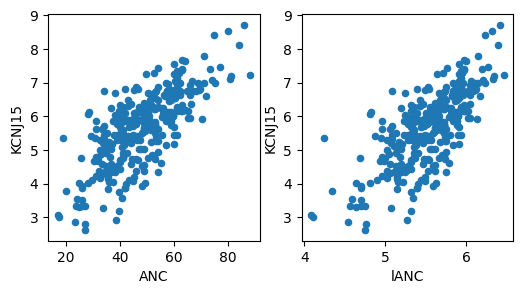

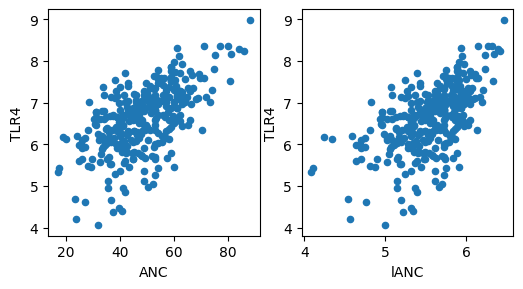

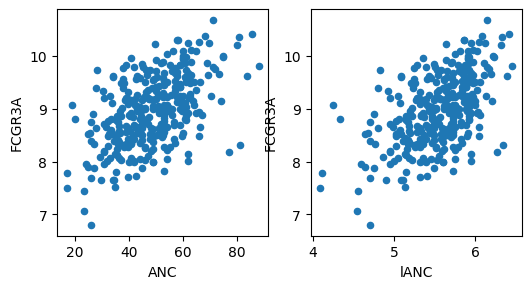

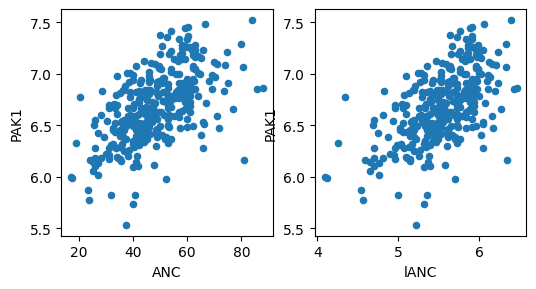

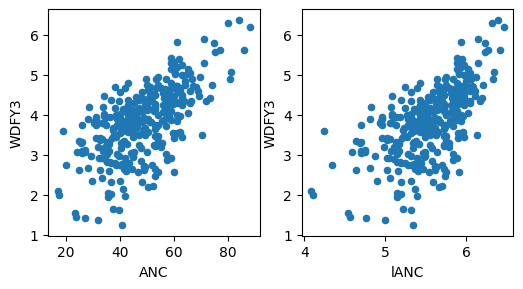

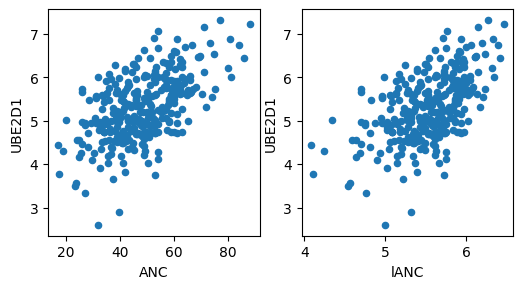

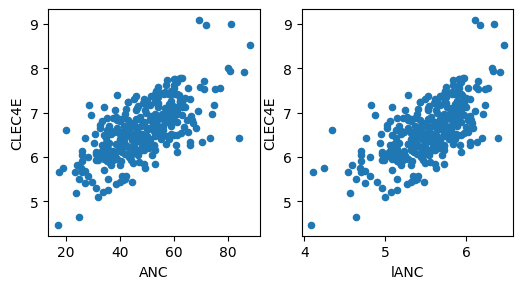

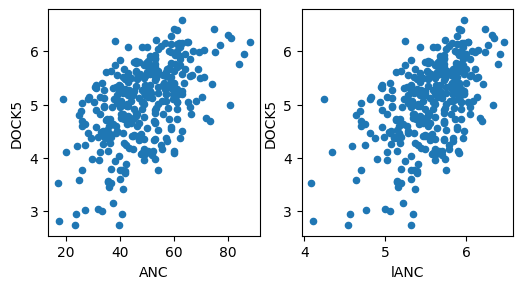

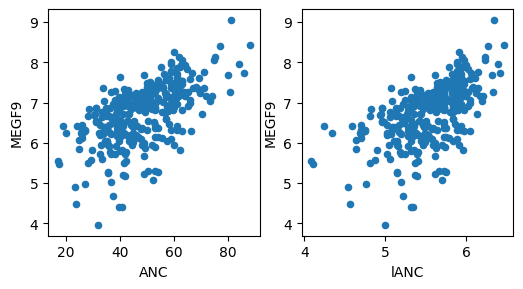

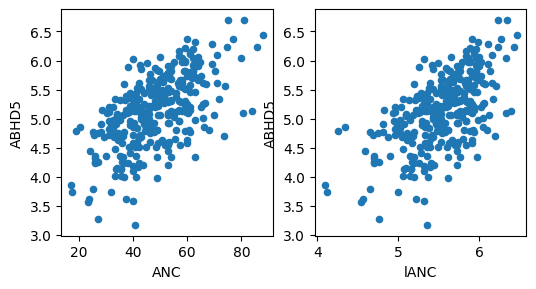

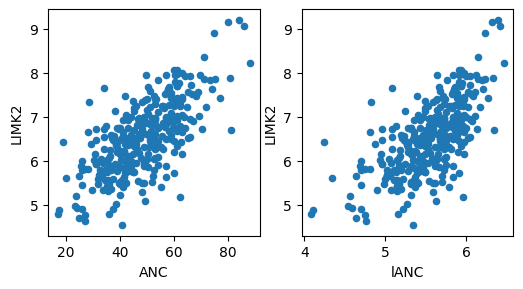

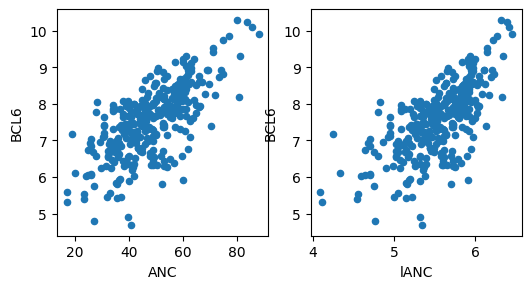

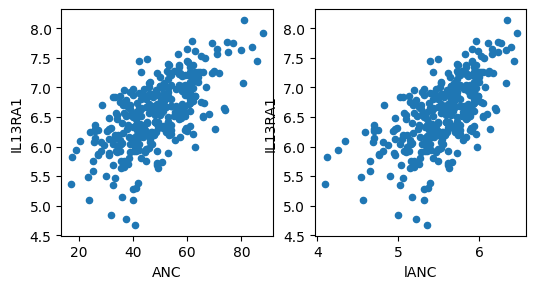

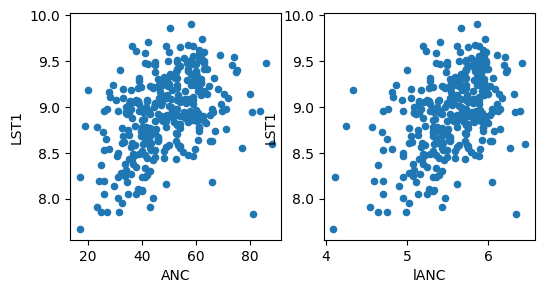

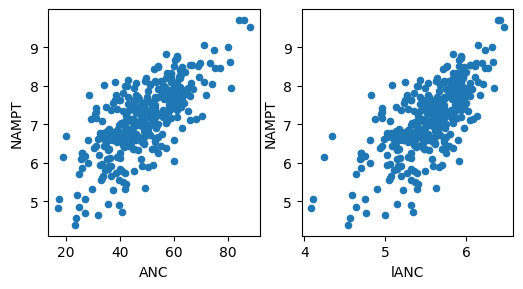

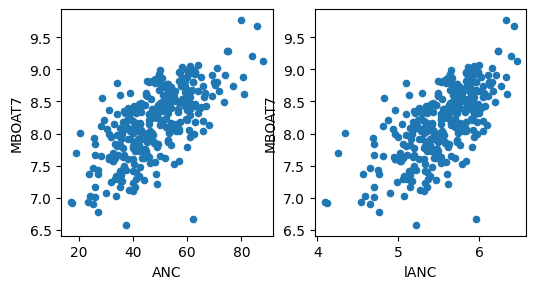

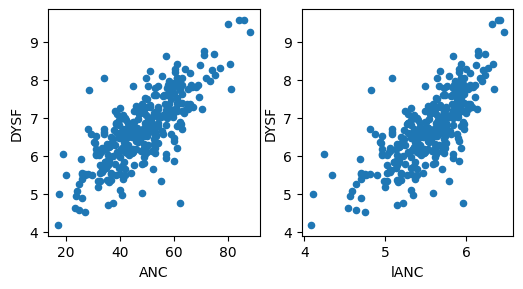

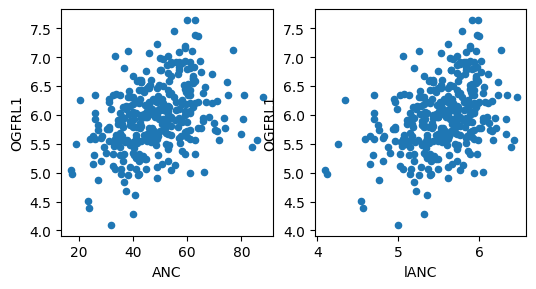

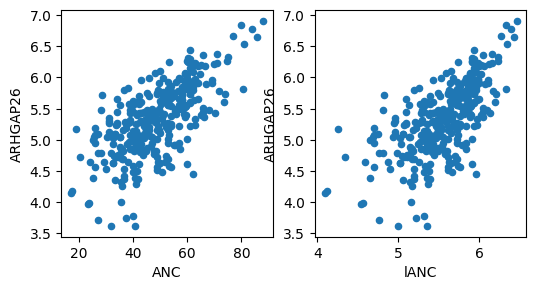

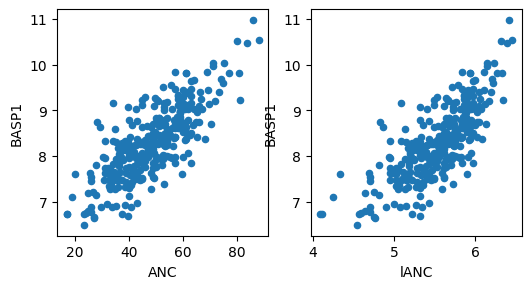

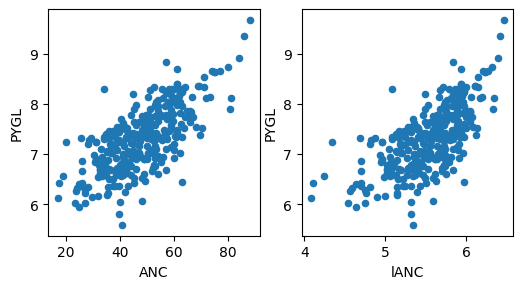

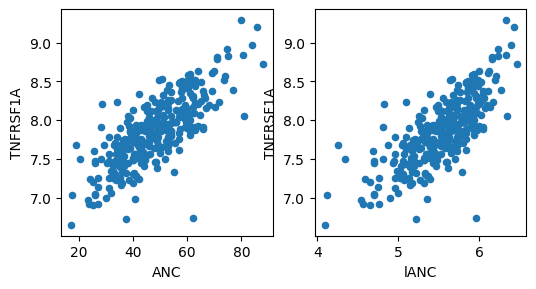

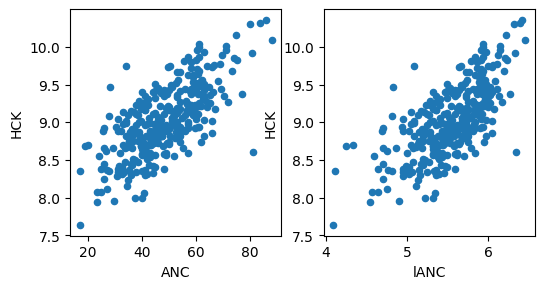

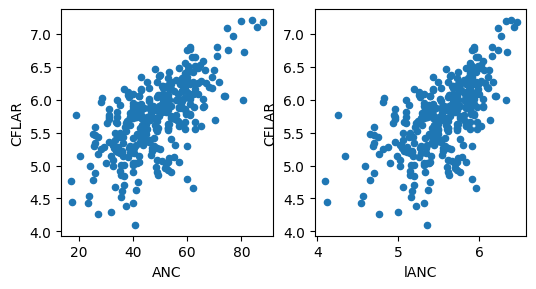

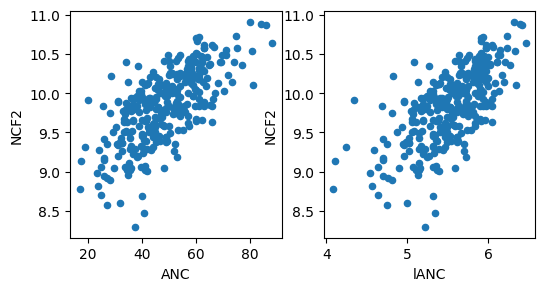

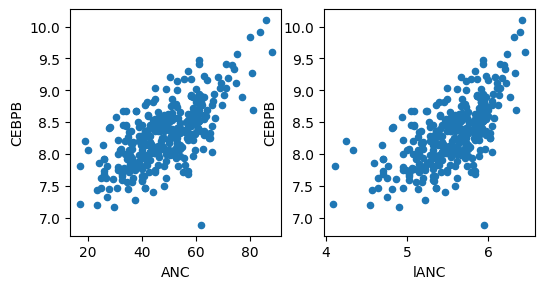

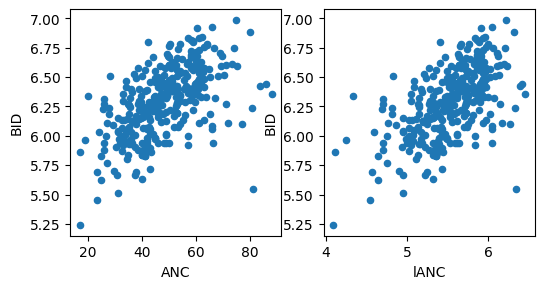

In [314]:
list1 = ['KCNJ15', 'TLR4', 'FCGR3A', 'PAK1', 'WDFY3', 'UBE2D1', 'FLJ11151',
         'CLEC4E', 'DOCK5', 'MEGF9', 'ABHD5', 'LIMK2', 'BCL6', 'IL13RA1', 'LST1', 
         'NAMPT', 'GPR109B', 'MBOAT7', 'DYSF', 'OGFRL1', 'ARHGAP26', 'BASP1',
         'PYGL', 'TNFRSF1A', 'HCK', 'CFLAR', 'NCF2', 'CEBPB', 'MIRN21', 'BID']
res = []
id1 = whole_dataset[1]
for g1 in list1:
    ana.getSurvival(id1[0])
    wbc = ana.h.getSurvName(id1[1])
    expr = ana.h.getExprData(g1)
    if expr is None:
        continue
    df = pd.DataFrame()
    ahash = {'NA':1, 'Not Applicable':1, 'Data Not Available':1,
             'unknown':1, 'Missing Data':1}
    df['ANC'] = pd.to_numeric(["" if k.strip() in ahash else k for k in wbc[2:]])
    df['lANC'] = np.log(df['ANC'])/np.log(2)
    df[g1] = pd.to_numeric(expr[2:])
    #atype = ana.h.getSurvName('c cell type')
    #df['Type'] = atype[2:]
    #df = df[df['Type'] == 'whole blood']
    fig,axlist = bone.plt.subplots(ncols=2, nrows=1, figsize=(6,3), dpi=100)
    df.plot.scatter('ANC', g1, ax=axlist[0])
    df.plot.scatter('lANC', g1, ax=axlist[1])
    #corr = df.corr('pearson')['WBC']['Exp']
    corr1 = ma.corrcoef(ma.masked_invalid(df[g1]), ma.masked_invalid(df['ANC']))[0][1]
    corr2 = ma.corrcoef(ma.masked_invalid(df[g1]), ma.masked_invalid(df['lANC']))[0][1]
    res += [(corr1, corr2, g1)]
res

In [236]:
[k[2] for k in res if k[0] > 0.7 and k[1] > 0.7]

['KCNJ15', 'NAMPT', 'DYSF', 'BASP1', 'TNFRSF1A']

In [315]:
[k[2] for k in res if k[0] > 0.7 and k[1] > 0.7]

['KCNJ15', 'NAMPT', 'DYSF', 'BASP1', 'TNFRSF1A']

In [19]:
ana = bone.IBDAnalysis()
ana.getNorvershtern2011()
ana.h.saveDiff("markers/novershtern-2011-diff.txt", ana.state[5], ana.state[1])

Novershtern 2011 Human Hematopoiesis (n = 211)
GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19
211 [187, 4, 4, 5, 6, 5] GSE24759 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=G19 G19


In [64]:
cfile = "markers/novershtern-2011-diff.txt"
df = mut.pd.read_csv(cfile, sep="\t", header=None)
df.columns=["ID", "Name", "T", "P", "Diff"]
df.index = df['ID']
df = df[df['ID'].isin([k[0] for k in res])]
df.sort_values('Diff', ascending=True).head(30)

ID          Name          T             P      Diff
ID                                                                       
204848_x_at  204848_x_at          HBG1 -21.632592  4.433643e-05 -8.314275
213515_x_at  213515_x_at          HBG1 -21.098737  2.857180e-05 -8.231545
204419_x_at  204419_x_at          HBG1 -19.826253  3.525132e-05 -8.190830
205033_s_at  205033_s_at         DEFA1 -18.624032  5.355796e-05 -8.100020
214414_x_at  214414_x_at          HBA2 -28.259727  3.975981e-05 -7.082480
211745_x_at  211745_x_at          HBA1 -21.046673  7.490641e-05 -7.057680
211699_x_at  211699_x_at          HBA1 -19.698798  2.248677e-04 -6.878995
204018_x_at  204018_x_at          HBA1 -18.529205  1.194666e-04 -6.780615
209458_x_at  209458_x_at          HBA1 -17.621137  1.687465e-04 -6.764220
213002_at      213002_at        MARCKS -17.247130  4.771970e-06 -6.741735
213095_x_at  213095_x_at          AIF1 -29.171528  6.203706e-07 -6.509105
211696_x_at  211696_x_at           HBB -15.805254  1.682096e-04 -6.458675
205159_at      205159_at        CSF2RB -33.683814  1.206204e-08 -6.358655
215051_x_at  215051_x_at          AIF1 -22.062445  2.940654e-07 -6.313970
201669_s_at  201669_s_at        MARCKS -15.251761  2.198185e-04 -6.296305
209901_x_at  209901_x_at          AIF1 -22.802490  1.000907e-06 -6.211035
218559_s_at  218559_s_at          MAFB -20.626607  1.821447e-07 -6.157845
217232_x_at  217232_x_at           HBB -15.613207  3.617308e-04 -6.131505
202917_s_at  202917_s_at        S100A8 -11.594446  1.025238e-04 -6.116315
217414_x_at  217414_x_at          HBA2 -17.466361  1.176034e-04 -6.116215
202510_s_at  202510_s_at       TNFAIP2 -24.955918  4.326226e-06 -6.115010
212188_at      212188_at        KCTD12 -12.120765  5.397334e-04 -6.035875
210982_s_at  210982_s_at       HLA-DRA -13.151762  2.982105e-04 -5.993515
204971_at      204971_at          CSTA -32.440874  9.576515e-07 -5.918770
209771_x_at  209771_x_at          CD24 -13.847551  1.150635e-04 -5.898475
209116_x_at  209116_x_at           HBB -13.010589  4.901514e-04 -5.873590
203066_at      203066_at  GALNAC4S-6ST -13.914696  4.016155e-04 -5.858175
214574_x_at  214574_x_at          LST1 -22.323575  1.048732e-06 -5.791575
208894_at      208894_at       HLA-DRA -10.900030  6.522784e-05 -5.783165
221698_s_at  221698_s_at        CLEC7A -33.702381  7.470767e-08 -5.760510

In [5]:
import random
random.seed(10)
ana = bone.IBDAnalysis()
ana.getGlobal()
sthr = 3
pthr = 0.11
order = [i for i in ana.h.aRange() if ana.atype[i] == 'solid']
print(len(order))
id1 = list(ana.h.getIDs("TYROBP").keys())[0]
print(id1)
e1 = ana.h.getExprData(id1)

id2 = list(ana.h.getIDs("FCGR3A").keys())[0]
print(id2)
e2 = ana.h.getExprData(id2)
thrx = bone.hu.getThrData(e1, 2, len(e1) - 1)
thry = bone.hu.getThrData(e2, 2, len(e2) - 1)
low = ana.h.getArraysAll(id1, thrx[2], "lo")
high = ana.h.getArraysAll(id1, thrx[3], "hi")
a_high, a_med = ana.h.getBitVector(low, high, order)
low = ana.h.getArraysAll(id2, thry[2], "lo")
high = ana.h.getArraysAll(id2, thry[3], "hi")
b_high, b_med = ana.h.getBitVector(low, high, order)
bs = bone.hu.getBooleanStats(a_high, a_med, b_high, b_med)
rel = bone.hu.getBooleanRelationType(bs, sthr, pthr)
print(rel, bs)

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
25955 [9780, 9272, 2144, 1533, 1383, 194, 96, 592, 4, 913, 44] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1
9272
204122_at
204006_s_at
(2, [31.396017392613672, 0.003259023354564756]) [[2503, 8, 1118, 2391], [1510.3539867109635, 1000.6460132890365, 2110.6460132890365, 1398.3539867109635], [-25.50783342615994, 31.396017392613672, 21.62325828976951, -26.508971334829553], [0.8437359316913273, 0.003259023354564756, 0.31359388101519525, 0.8387232905982906]]


In [148]:
ana = bone.IBDAnalysis()
ana.getGlobal()
id1 = list(ana.h.getIDs("FCGR3A").keys())[0]
print(id1)
fres1 = getRelStatsJava(ana, id1, ana.order, sthr=3, pthr=0.1)
print([(k, len(fres1[k])) for k in fres1])
order = [i for i in ana.h.aRange() if ana.atype[i] == 'solid']
fres2 = getRelStatsJava(ana, id1, order, sthr=3, pthr=0.1)
print([(k, len(fres2[k])) for k in fres2])
order = [i for i in ana.h.aRange() if ana.atype[i] == 'liquid']
fres3 = getRelStatsJava(ana, id1, order, sthr=3, pthr=0.1)
print([(k, len(fres3[k])) for k in fres3])

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
25955 [9780, 9272, 2144, 1533, 1383, 194, 96, 592, 4, 913, 44] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1
204006_s_at
[(0, 48269), (4, 5505), (2, 94), (3, 806), (5, 2)]
[(0, 46632), (4, 6212), (3, 1749), (2, 81), (5, 2)]
[(0, 46744), (2, 3152), (3, 719), (4, 1429), (1, 2543), (5, 64), (6, 25)]


In [135]:
ana = bone.IBDAnalysis()
ana.getGlobal()
id1 = list(ana.h.getIDs("FCGR3A").keys())[0]
id1 = '210484_s_at'
print(id1)
cres1 = getRelStatsJava(ana, id1, ana.order, sthr=3, pthr=0.1)
print([(k, len(cres1[k])) for k in cres1])
order = [i for i in ana.h.aRange() if ana.atype[i] == 'solid']
cres2 = getRelStatsJava(ana, id1, order, sthr=3, pthr=0.1)
print([(k, len(cres2[k])) for k in cres2])
order = [i for i in ana.h.aRange() if ana.atype[i] == 'liquid']
cres3 = getRelStatsJava(ana, id1, order, sthr=3, pthr=0.1)
print([(k, len(cres3[k])) for k in cres3])

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
25955 [9780, 9272, 2144, 1533, 1383, 194, 96, 592, 4, 913, 44] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1
210484_s_at
[(0, 27434), (4, 19496), (3, 7741), (5, 5)]
[(0, 54676)]
[(0, 41965), (4, 7957), (3, 4544), (2, 169), (5, 28), (1, 12), (6, 1)]


In [181]:
cid1 = [k for k in fres1[2] if k in rhash['Percentile'] and rhash['Percentile'][k] > 90]
c1 = [ana.h.getSimpleName(k) for k in cid1]
c1 = [k for k in bone.hu.uniq(c1) if k != '---']
print(" ".join(c1))
len(cid1)

GPR97 NLRP12 HCG27 FCGR3B FPR1 TNFRSF10C CXCR2 CXCR1 MMP25 CCR3 CR1 SLC11A1 EMR3 FPR2 CEACAM3 PILRA TLR8 FFAR2 CLEC4A CLEC4E OR52K3P NFAM1


36

In [184]:
ana = bone.IBDAnalysis()
ana.getGlobal()
cidres = []
for id1 in cid1:
    print(id1, ana.h.getSimpleName(id1))
    order = [i for i in ana.h.aRange() if ana.atype[i] == 'liquid']
    cidres1 = getRelStatsJava(ana, id1, order, sthr=3, pthr=0.1)
    print([(k, len(cidres1[k])) for k in cidres1])
    cidres += [cidres1]

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
25955 [9780, 9272, 2144, 1533, 1383, 194, 96, 592, 4, 913, 44] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1
1553723_at GPR97
[(0, 39697), (4, 10123), (3, 4667), (2, 137), (5, 43), (1, 9)]
1554624_a_at SIRPB1
[(0, 47535), (3, 615), (4, 1354), (2, 3317), (1, 1764), (5, 63), (6, 28)]
1554952_s_at NLRP12
[(0, 45641), (4, 3492), (3, 1631), (2, 2470), (1, 1302), (6, 44), (5, 96)]
1559050_at HCG27
[(0, 48363), (4, 3882), (3, 1853), (2, 375), (1, 163), (5, 35), (6, 5)]
1563509_at ---
[(0, 47419), (4, 2360), (2, 2567), (3, 934), (1, 1360), (5, 26), (6, 10)]
1565674_at FCGR2A
[(0, 49725), (3, 640), (2, 2269), (4, 1206), (1, 806), (6, 18), (5, 12)]
204007_at FCGR3B
[(0, 50892), (4, 1784), (3, 854), (2, 697), (1, 447), (5, 2)]
205119_s_at FPR1
[(0, 47540), (2, 3053), (3, 582), (4, 964), (1, 2476), (5, 53), (6, 8)]
206222_at TNFRSF10C
[(0, 43689), (4, 7310), (3, 3284), 

In [230]:
ana = bone.IBDAnalysis()
ana.getGlobal()
df = bone.pd.read_csv(ana.h.rdataset.getVInfo(), sep="\t", index_col=0)
dr = bone.pd.to_numeric(df['97.5%']) - bone.pd.to_numeric(df['2.5%'])
c1 = [i for k in cidres for i in k[5] if rhash['Percentile'][i] > 98 and dr[i] > 4]
c1 = [ana.h.getSimpleName(k) for k in c1]
c1 = [k for k in bone.hu.uniq(c1) if k != '---']
print(" ".join(c1))
print(c1)

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
25955 [9780, 9272, 2144, 1533, 1383, 194, 96, 592, 4, 913, 44] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1
KCNJ15 TLR4 FCGR3A PAK1 WDFY3 UBE2D1 FLJ11151 CLEC4E DOCK5 MEGF9 ABHD5 LIMK2 BCL6 IL13RA1 LST1 NAMPT GPR109B MBOAT7 DYSF OGFRL1 ARHGAP26 BASP1 PYGL TNFRSF1A HCK CFLAR NCF2 CEBPB MIRN21 BID
['KCNJ15', 'TLR4', 'FCGR3A', 'PAK1', 'WDFY3', 'UBE2D1', 'FLJ11151', 'CLEC4E', 'DOCK5', 'MEGF9', 'ABHD5', 'LIMK2', 'BCL6', 'IL13RA1', 'LST1', 'NAMPT', 'GPR109B', 'MBOAT7', 'DYSF', 'OGFRL1', 'ARHGAP26', 'BASP1', 'PYGL', 'TNFRSF1A', 'HCK', 'CFLAR', 'NCF2', 'CEBPB', 'MIRN21', 'BID']


In [57]:
ana = bone.IBDAnalysis()
ana.getGlobalNeu()
res = getHighJava(ana, 1, 8, 25)

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
25955 [25904, 51] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1


In [61]:
[k for k in res if k[1] == 'FCGR3A']

[['204006_s_at', 'FCGR3A', '51']]

In [89]:
import scipy
ana = bone.IBDAnalysis()
ana.getGlobalNeu()
tn = 1
fp = ana.h.fp;
fp.seek(0, 0);
head = fp.readline();
index = 0
rhash = {}
for line in fp:
    ll = line.split("\t")
    v1 = [float(ll[i]) for i in ana.order]
    v2 = [float(ll[i]) for i in ana.state[tn]]
    m2 = bone.np.mean(v2)
    thr = ana.h.getThrData(ll[0])
    v1_hi = [k for k in v1 if k > thr[0]]
    v1_lo = [k for k in v1 if k <= thr[0]]
    if m2 > thr[0]:
        perc = scipy.stats.percentileofscore(v1_hi, m2)
    else:
        perc = -scipy.stats.percentileofscore(v1_lo, m2)
    rhash[ll[0]] = perc
    index += 1
    if (index % 1000) == 0:
        print(index)

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
25955 [25904, 51] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000


In [88]:
x = range(20, 50)
import scipy
scipy.stats.percentileofscore(x, 50)
#bone.np.quantile(x, 1)

100.0

In [107]:
[(k,ana.h.getSimpleName(k)) for k in rhash if rhash[k] >=99.4]

[('1552617_a_at', '---'),
 ('1568954_s_at', 'C16orf72'),
 ('1570078_a_at', 'DOCK5'),
 ('200797_s_at', 'MCL1'),
 ('200904_at', 'HLA-E'),
 ('201786_s_at', 'ADAR'),
 ('201869_s_at', 'TBL1X'),
 ('201921_at', '---'),
 ('202910_s_at', 'CD97'),
 ('203509_at', 'SORL1'),
 ('203518_at', 'LYST'),
 ('203942_s_at', 'MARK2'),
 ('203964_at', 'NMI'),
 ('204053_x_at', '---'),
 ('204312_x_at', 'CREB1'),
 ('204313_s_at', 'CREB1'),
 ('204633_s_at', 'RPS6KA5'),
 ('205159_at', 'CSF2RB'),
 ('206764_x_at', '---'),
 ('207643_s_at', 'TNFRSF1A'),
 ('207983_s_at', 'STAG2'),
 ('209105_at', 'NCOA1'),
 ('209106_at', '---'),
 ('209107_x_at', 'NCOA1'),
 ('209310_s_at', 'CASP4'),
 ('209864_at', 'FRAT2'),
 ('210249_s_at', 'NCOA1'),
 ('210483_at', '---'),
 ('211256_x_at', 'BTN2A1'),
 ('211800_s_at', 'USP4'),
 ('211982_x_at', 'XPO6'),
 ('212602_at', 'WDFY3'),
 ('212606_at', 'WDFY3'),
 ('212823_s_at', 'PLEKHG3'),
 ('212830_at', 'MEGF9'),
 ('213727_x_at', '---'),
 ('214513_s_at', 'CREB1'),
 ('214784_x_at', 'XPO6'),
 ('21515

In [178]:
rhash = bone.pd.read_csv("markers/human-gpl570-neu-perc.txt", sep="\t", index_col=0)
rhash['Percentile']['1570078_a_at']

99.4463

In [117]:
resfile = "/Users/rohan/public_html/Hegemon/BECC/Neutrophil/FCGR3A/res-hs-select.txt"
genes = hu.uniq(bone.getEntries(resfile, 3))
#genes.remove("FCGR3A")
print(len(genes))
print(" ".join([bone.re.sub(": .*", "", k) for k in genes]))

81
CHST15 DOCK5 CXCR2 TMCC3 RAB11FIP1 LRRK2 TMEM49 FCGR3A /// FCGR3B SLC15A4 HAL NRBF2 RGS2 MSL1 IL13RA1 PLXNC1 NEDD9 NUMB EMR2 TMEM43 FAM49A LRRC4 PICALM C3orf34 CTBS MIR21 /// TMEM49 C14orf4 ZNF238 PGCP CPPED1 MGC31957 CXCR2 /// CXCR2P1 C5orf41 CLEC7A ARHGAP25 BOD1L EGLN1 PELI2 MAP4K4 MGC31957 /// TNFRSF10C IDS SMCHD1 SRPK2 PREX1 TDP2 C12orf35 ST6GALNAC2 MYLIP PPTC7 PILRA BACH1 WIPF1 CREBBP VNN3 GAB2 BTN2A1 SPAG9 TREM1 CD46 JMJD1C CRISPLD2 C3orf62 RAF1 C1orf183 GLIPR1 RERE KCNJ15 IGF2R HSD17B11 MME NOTCH2 TMEM154 RUNX2 PKN2 IL6R CEP63 ELOVL5 LAMP2 KPNB1 ZCCHC6 UBN1 GIMAP4


In [132]:
s1 = [ana.h.getSimpleName(k) for k in rhash if rhash[k] >=99.4]
s2 = [bone.re.sub(": .*", "", k) for k in genes]
" ".join(set(s1).intersection(s2))

'NRBF2 DOCK5 MGC31957 CTBS BTN2A1'

In [177]:
rhash['Percentile']['205119_s_at']

97.8889

In [13]:
import SMaRT.MacUtils as mut
reload(mut)
#urlbase = "http://hegemon.ucsd.edu/Tools/explore.php"
#urlbase = "http://hegemon.ucsd.edu/~dtv004/Hegemon/explore.php"
urlbase = "http://hegemon.ucsd.edu/~m2haque/Hegemon/explore.php"
ana = mut.MacAnalysis(urlbase)
ana.dbid = "N12"
ana.dataset = mut.hu.getHegemonDataset(ana.dbid, ana.urlbase)
ana.num = ana.dataset[2]
ana.name = ana.dataset[1]
ana.source = ana.dataset[3]
print(ana.urlbase)
print(ana.num)
print(ana.name)
print(ana.source)
atype = ana.getSurvName('c cellType (ch1)')
#atype = [mut.re.sub(",.*", "", str(k)) for k in atype]
mut.hu.uniq(atype)

http://hegemon.ucsd.edu/~m2haque/Hegemon/explore.php
28
Scott 2022[cellType]
GSE185224


['10',
 'c cellType (ch1)',
 'EEC',
 'FAE',
 'paneth',
 'TA',
 'tuft',
 'BEST4+',
 'secretory_prog',
 'goblet',
 'ISC',
 'absorptive']

In [272]:
hu = bone.hu
reload(hu)
db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
#db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
#db = hu.Database("/Users/sataheri/public_html/Hegemon/explore.conf")
#db = hu.Database("/Users/mgosztyl/public_html/Hegemon/explore.conf")
dbid = "MACV331"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
title = h.getTitle()
print (title)
#atype = h.getSurvName('c timepoint')
#atype = [hu.re.sub("_.*", "", str(k)) for k in atype]
#atype = [re.sub("([74]) .*", "\\1", str(k)) for k in atype]
#atype = [str(k).split("_")[2] if len(str(k).split("_")) > 2
#         else None for k in atype]
#u.uniq(atype)
h.survhdrs
#obj = hu.getHegemonPlots(dbid, "7896738", "7896740")
#hu.plotBooleanPair(obj[0])

Groth 2020 sputum (GSE148004; n = 25)


['ArrayID',
 'time',
 'status',
 'c Title',
 'c src1',
 'c gsmid',
 'c disease group',
 'c fixation/preservation technique',
 'c age (years)',
 'c gender',
 'c inhalative corticosteroid dose (daily fluticasone equivalent µg)',
 'c cumulative packyears',
 'c diff cell count alveolar macrophages (%)',
 'c diff cell count neutrophils (%)',
 'c diff cell count eosinophils (%)',
 'c diff cell count lymphocytes (%)',
 'c diff cell count ciliated cells (%)',
 'c diff cell count monocytes (%)',
 'c diff cell count squamous cells (%)',
 'c rna integrity number (rin)',
 'c arr']